In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.5.3
3.0


In [4]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [5]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [6]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [52]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [53]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('All Costs', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x000001A9F2F0F9C0>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x000001A9F2F0F9C0>)


In [7]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

KeyboardInterrupt: 

In [8]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

NameError: name 'results' is not defined

In [56]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,All Costs,Expected Number of Deaths
0,1.620381e+09,0.002782
1,1.610259e+09,0.000299
2,1.609983e+09,0.000108
3,1.609302e+09,0.000000
4,1.609302e+09,0.000000
...,...,...
195,1.929281e+09,0.002384
196,1.909418e+09,0.000630
197,1.908311e+09,0.000185
198,1.920369e+09,0.001897


In [27]:
# defining specific policies
# for example,
# Policy 0 is a "do nothing" policy
# policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations
# policy 4 is performing all room for the river projects in first timestep
# Policy 5 is raising all dike-rings with 5 dm
# Delta Commission wants ultimate protection of drinkwater and water safety (people)
# Environmental interest group want least room for river?
# Transport company wants the best protection of roadnetwork, so wants either increase in dike height or rfr on non road networks
# Gelderland province wants protection in dike ring 1(heigh dikes, compensation),2(height dikes, compensation),3 (high dikes) and want to give least rfr
# Overijssel province wants protection in dike ring 4 (no rfr, ecological farming?) and 5 (high dikes, because city near) and want to give least rfr or Gelderland to give rfr
# Rijkswaterstaat wants the road network to be kept in good condition and the state to keep functioning. Everyone should be accessible. Rijkswaterstaat also wants all actors to be content and also have interest in all the dike rings

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),

        Policy(
        "policy 4",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1,"4_RfR 0": 1}
        )
    ),
        Policy(
        "policy 5",
        **dict(
            get_do_nothing_dict(),
            **{"A.1_DikeIncrease 0":5,"A.2_DikeIncrease 0":5,"A.3_DikeIncrease 0":5,"A.4_DikeIncrease 0":5,"A.5_DikeIncrease 0":5}
        )
    ),
        Policy(
        "Delta Commission",
        **dict(
            get_do_nothing_dict(),
            **{"A.1_DikeIncrease 0":5,"A.2_DikeIncrease 0":5,"A.3_DikeIncrease 0":5,"A.4_DikeIncrease 0":5,"A.5_DikeIncrease 0":5}
        )
    ),
]

In [28]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 100 scenarios * 6 policies * 1 model(s) = 600 experiments
100%|████████████████████████████████████████| 600/600 [02:14<00:00,  4.45it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [29]:
experiments, outcomes = results

In [30]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,3.366365e+09,1.967345,1.644111e+07,0.013459,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
1,2.194109e+07,0.014965,9.152161e+07,0.080955,1.163536e+09,1.876940,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
2,9.236377e+07,0.080416,3.988701e+07,0.046341,3.301216e+07,0.073238,4.637936e+07,0.026796,0.000000e+00,0.000000,0.0,0.0
3,0.000000e+00,0.000000,1.447365e+07,0.015564,4.515746e+07,0.090400,1.092379e+07,0.006377,1.187040e+08,0.119010,0.0,0.0
4,4.075323e+08,0.415262,2.442329e+08,0.320733,1.465073e+09,3.617594,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,5.397251e+07,0.000000,5.941010e+07,0.000000,2.879840e+07,0.000000,1.106877e+07,0.000000,3.667668e+07,0.000000,0.0,0.0
596,2.096675e+08,0.114873,5.941010e+07,0.000000,2.879840e+07,0.000000,1.106877e+07,0.000000,1.204969e+08,0.079365,0.0,0.0
597,5.397251e+07,0.000000,5.941010e+07,0.000000,3.010493e+07,0.002420,1.106877e+07,0.000000,5.424072e+07,0.016309,0.0,0.0
598,5.397251e+07,0.000000,5.941010e+07,0.000000,2.879840e+07,0.000000,1.614744e+07,0.002717,8.516541e+07,0.042122,0.0,0.0


In [31]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,1,127.558953,1.0,0.282747,253.598579,1.0,0.403445,82.841151,10.0,0.863681,...,0,0,0,0,0,0,0,254,policy 0,dikesnet
1,85,207.789061,1.0,0.740955,247.748999,1.5,0.457687,111.323840,1.0,0.251438,...,0,0,0,0,0,0,0,255,policy 0,dikesnet
2,7,160.177607,1.0,0.598717,37.962927,1.0,0.701691,96.304348,10.0,0.859555,...,0,0,0,0,0,0,0,256,policy 0,dikesnet
3,116,59.725063,1.5,0.802824,159.121233,1.0,0.855468,196.142856,1.0,0.880487,...,0,0,0,0,0,0,0,257,policy 0,dikesnet
4,103,298.513828,1.0,0.436463,346.317753,1.0,0.197870,189.647118,1.5,0.048810,...,0,0,0,0,0,0,0,258,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,115,253.239612,1.5,0.501926,150.892051,1.5,0.686490,182.181457,1.5,0.879798,...,0,5,0,0,5,0,0,349,policy 5,dikesnet
596,127,271.314561,10.0,0.050555,284.651057,1.0,0.675291,80.945610,10.0,0.415912,...,0,5,0,0,5,0,0,350,policy 5,dikesnet
597,50,349.963860,1.0,0.190214,287.285704,10.0,0.748458,254.291398,1.0,0.429108,...,0,5,0,0,5,0,0,351,policy 5,dikesnet
598,66,288.170184,10.0,0.815240,145.406571,1.5,0.787433,168.091618,10.0,0.553439,...,0,5,0,0,5,0,0,352,policy 5,dikesnet


In [32]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [33]:
data

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,3.366365e+09,1.967345,1.644111e+07,0.013459,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,policy 0
1,2.194109e+07,0.014965,9.152161e+07,0.080955,1.163536e+09,1.876940,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,policy 0
2,9.236377e+07,0.080416,3.988701e+07,0.046341,3.301216e+07,0.073238,4.637936e+07,0.026796,0.000000e+00,0.000000,0.0,0.0,policy 0
3,0.000000e+00,0.000000,1.447365e+07,0.015564,4.515746e+07,0.090400,1.092379e+07,0.006377,1.187040e+08,0.119010,0.0,0.0,policy 0
4,4.075323e+08,0.415262,2.442329e+08,0.320733,1.465073e+09,3.617594,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,policy 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5.397251e+07,0.000000,5.941010e+07,0.000000,2.879840e+07,0.000000,1.106877e+07,0.000000,3.667668e+07,0.000000,0.0,0.0,policy 5
596,2.096675e+08,0.114873,5.941010e+07,0.000000,2.879840e+07,0.000000,1.106877e+07,0.000000,1.204969e+08,0.079365,0.0,0.0,policy 5
597,5.397251e+07,0.000000,5.941010e+07,0.000000,3.010493e+07,0.002420,1.106877e+07,0.000000,5.424072e+07,0.016309,0.0,0.0,policy 5
598,5.397251e+07,0.000000,5.941010e+07,0.000000,2.879840e+07,0.000000,1.614744e+07,0.002717,8.516541e+07,0.042122,0.0,0.0,policy 5


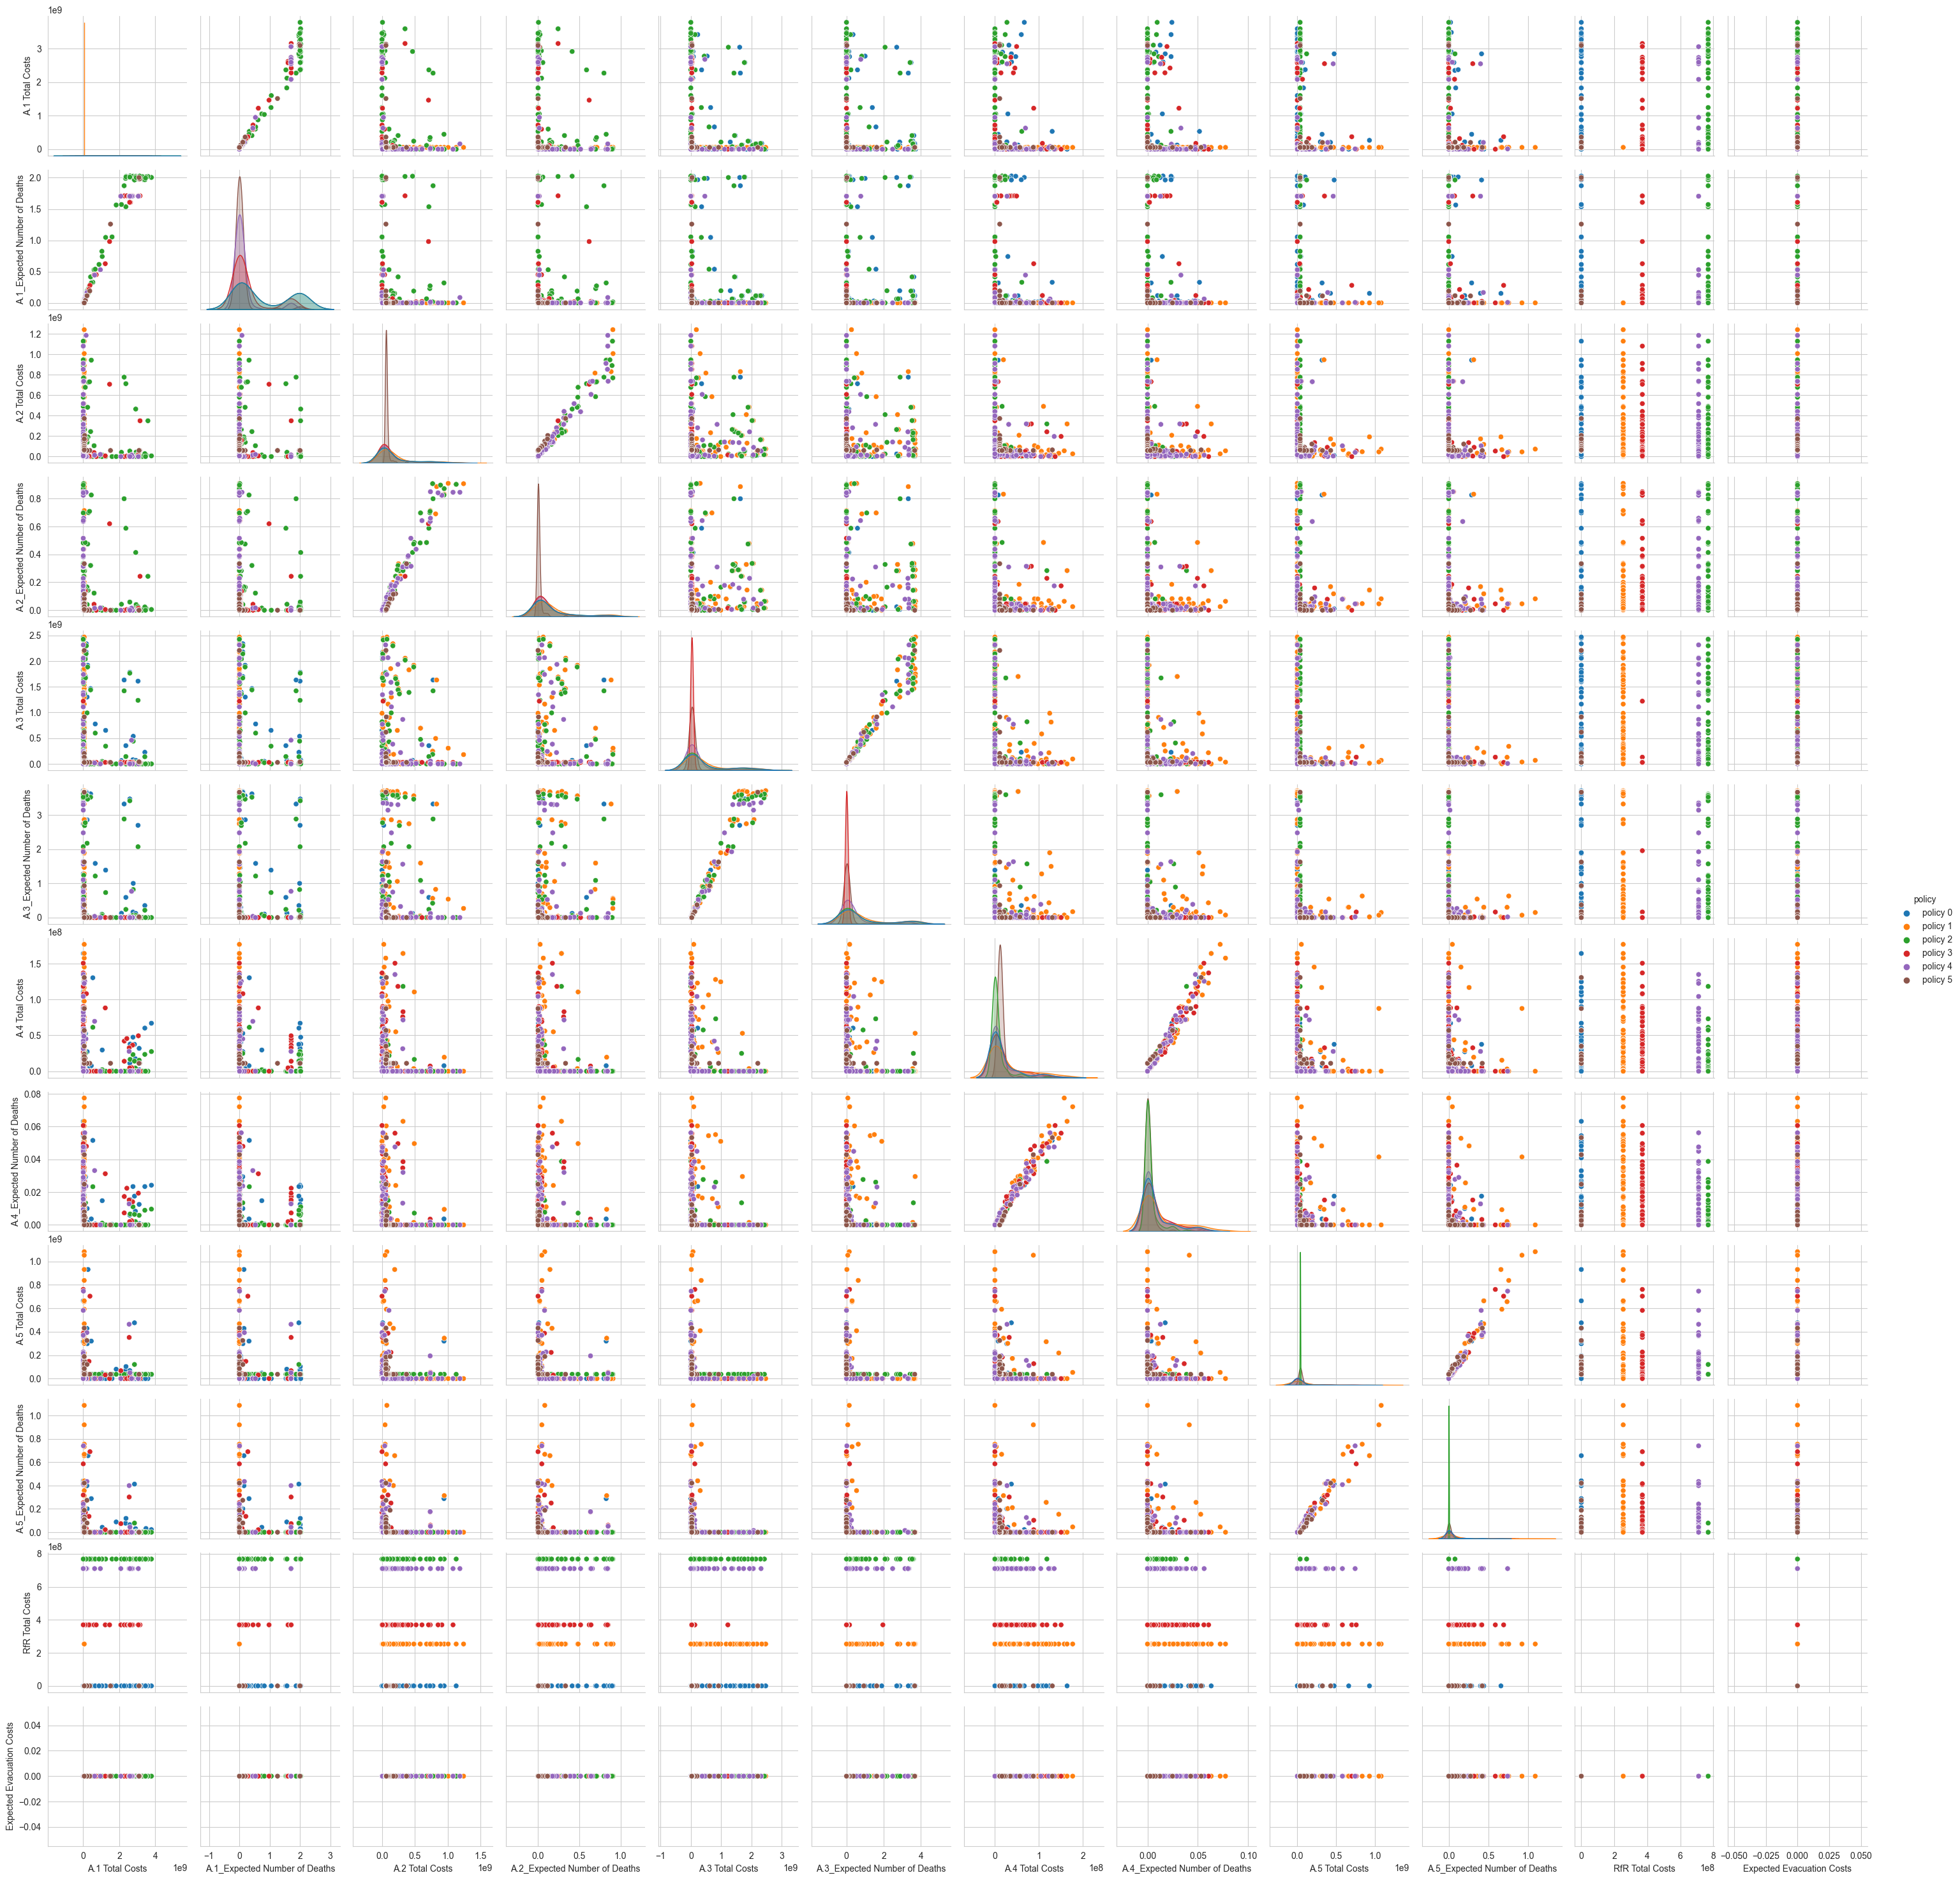

In [34]:
sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()